In [0]:
from time import time
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

In [0]:
from google.colab import drive
drive.mount('/content/drive')
data = "/content/drive/My Drive/Colab Notebooks/face.mat"

In [0]:
faces = sio.loadmat(data)
X_train, X_test, y_train, y_test = [], [], [], []
for i in range(52):
    face_i = faces['X'][:, 10*i:10*(i+1)]
    label_i = faces['l'][:, 10*i:10*(i+1)]
    X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(
        face_i.T, label_i.T, test_size=0.2)
    X_train.append(X_train_temp)
    X_test.append(X_test_temp)
    y_train.append(y_train_temp)
    y_test.append(y_test_temp)    

In [0]:
X_train = np.concatenate(X_train)
X_test = np.concatenate(X_test)
y_train = np.concatenate(y_train)
y_test = np.concatenate(y_test)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

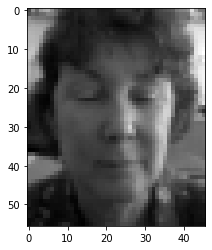

In [0]:
x = np.reshape(X_train[0], (46, 56))
plt.imshow(x.T, cmap='gist_gray')

In [0]:
face_images = []
for i in range(50):
    face_i = faces['X'][:, i]
    face_i = np.reshape(face_i, (46,56))
    face_i = face_i.T
    face_images.append(face_i)

In [0]:
h, w = 10, 10
nrows, ncols = 5, 10
figsize = [46, 56]

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

for i, axi in enumerate(ax.flat):
    x = np.reshape(u.T[i], (46, 56))
    
    axi.imshow(x.T, cmap='gist_gray')
    rowid = i
    colid = i % ncols
plt.tight_layout(True)
plt.show()

#PCA Analysis

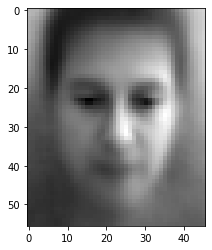

In [0]:
# mean face
N, _ = X_train.shape
image = np.zeros(X_train.shape[1])
for im in X_train:
    image += im
face_avg = image * 1/N
face_avg = np.array(face_avg).reshape(2576, 1)
face_avg = normalize(face_avg, axis=0, norm='l1')
x = np.reshape(face_avg, (46, 56))
plt.imshow(x.T, cmap='gist_gray')

# modification required for using it when performing calculations
face_avg = np.array(face_avg.T[0])

In [0]:
A = [X_train[i]-face_avg for i in range(N)]
A = np.array(A)
A = A.T
A.shape

(2576, 416)

In [0]:
S = 1/N*A.dot(A.T)

In [0]:
# low dimensional PCA
S_low = 1/N*A.T.dot(A)
eigvals_v, v = np.linalg.eig(S_low)

In [0]:
# eigvals of big covariance S
eigvals_u, u = np.linalg.eig(S)

In [0]:
uu = []
for a in u:
  uu.append(np.real(a))
evec_U = np.array(uu)

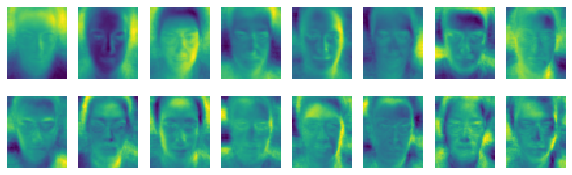

In [0]:
import numpy as np
import matplotlib.pyplot as plt

w=10
h=5
fig=plt.figure(figsize=(10, 3))
columns = 8
rows = 2
for i in range(1, columns*rows +1):
    img = np.reshape(evec_U.T[i], (46, 56))
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(img.T)
plt.show()

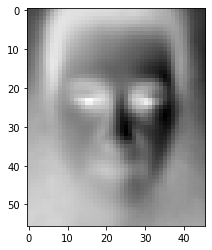

In [0]:
x = np.reshape(evec_U.T[0], (46, 56))
plt.imshow(x.T, cmap='gist_gray')

In [0]:
# face_avg = np.reshape(face_avg, (2576, 1))
face_avg

array([0.00053317, 0.00053092, 0.00052065, ..., 0.00037817, 0.00036971,
       0.00036193])

In [0]:
count = 0
evl = dict()
for v in eigvals_v:
  evl[round(v, 2)] = 1

for u in eigvals_u[:416]:
  count += evl.setdefault(round(u, 2), 0)
print(count)

416


# Image Reconstruction

In [0]:
# use low dimensional v to obtain u
u = A.dot(v)
print(u.shape)

(2576, 416)


In [0]:
u = normalize(u, axis=0, norm='l1')
print(u)
# funciona cuando los vectores estan en forma de 1e-04 en vez de 0.0001

[[-5.23183404e-04  3.59472360e-04 -1.27410541e-04 ... -9.55091624e-04
   3.72227063e-04 -2.06818332e-04]
 [-5.25097389e-04  3.57198091e-04 -1.71739490e-04 ... -1.63819602e-03
   1.94227289e-04 -3.47336067e-06]
 [-5.13944873e-04  3.77282771e-04 -2.10067059e-04 ... -2.60794168e-05
  -1.82144616e-04  5.17850944e-04]
 ...
 [-3.61477707e-04 -1.23195750e-03 -3.07691486e-04 ... -4.85573183e-04
  -7.59361729e-04  6.34052732e-04]
 [-3.53261588e-04 -1.22189890e-03 -3.01190365e-04 ... -1.91990136e-04
   1.26221024e-04  1.03987538e-04]
 [-3.48258564e-04 -1.23645065e-03 -2.67827685e-04 ...  9.47761022e-04
  -7.77603488e-04  1.68864353e-04]]


In [0]:
# weights: representing faces onto eigenfaces
w = A.T.dot(u)
w = w.T
w.shape 

(416, 416)

In [0]:
w_0 = A.T[0].dot(u)
w_0 = w_0.T
w_0[0]

-82.916480172086

In [0]:
# reconstruction of all faces
all_recon_faces = []
for i in range(w.shape[0]):
  recon_face = np.zeros(face_avg.shape)
  for a, eface in zip(w.T[i], u.T):
    recon_face += a*eface
  recon_face += face_avg
  all_recon_faces.append(recon_face)

In [0]:
# reconstruction varying the amount of eigenfaces
all_recon_faces_M = []
M = 5
for i in range(w.shape[0]):
  recon_face = np.zeros(face_avg.shape)
  for a, eface in zip(w.T[i][:M], u.T[:M]):
    recon_face += a*eface
  recon_face += face_avg
  all_recon_faces_M.append(recon_face)

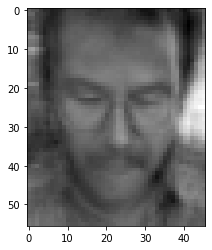

In [0]:
x = np.reshape(all_recon_faces_M[415], (46, 56))
plt.imshow(x.T, cmap='gist_gray')

# Minimum error formulation of PCA

In [0]:
# Compute matrix A for the testing images
N_test = X_test.shape[0]
A_test = [X_test[i]-face_avg for i in range(N_test)]
A_test = np.array(A_test)
A_test = A_test.T
A_test.shape

(2576, 104)

In [0]:
M = 416 # change according to the evecs i want to include
# put the evecs of u into m so we dont change the values or shape of the OG vector
m = u
m = m.T[:M]
m = m.T
m.shape

(2576, 416)

In [0]:
# weights calculation
w_test = A_test.T.dot(m)
w_test = w_test.T
w_test.shape

(416, 104)

In [0]:
 # calculate predicted labels
y_pred = []
for test in w_test.T:
  min_e = float('inf')
  label = 0
  for i in range(X_train.shape[0]):
    error = np.linalg.norm(test-w.T[i][:M])
    if error < min_e:
      min_e = error
      label = y_train[i][0]
  y_pred.append(label)


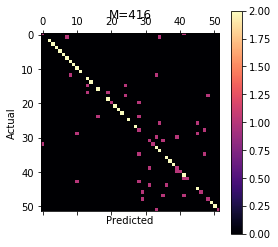

In [0]:
# confusion matrix for M=416
from sklearn.metrics import confusion_matrix

y_actu = list(y_test.flatten())
cm = confusion_matrix(y_actu, y_pred)

plt.matshow(cm, cmap = 'magma')
plt.colorbar()
plt.title('M={}'.format(M))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [0]:
# calculate accuracy
correct_labels = 0
for actu, pred in zip(y_actu, y_pred):
  correct_labels = correct_labels + 1 if actu == pred else correct_labels

accuracy = correct_labels / len(y_actu) * 100
print(accuracy)

64.42307692307693


In [0]:
print(y_actu[:5])

print(y_pred[:5])


[1, 1, 2, 2, 3]
[1, 42, 35, 8, 3]


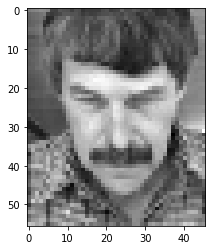

In [0]:
x = np.reshape(all_recon_faces[42*8+1], (46, 56))
plt.imshow(x.T, cmap='gist_gray')

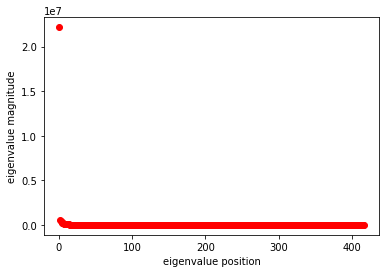

In [0]:

# plot the evals position with the evals magnitude
x_axis = [i for i in range(1, len(eigvals_v)+1)]
plt.plot(x_axis, eigvals_v, 'ro')
plt.xlabel('eigenvalue position')
plt.ylabel('eigenvalue magnitude')
plt.show()

In [0]:
M


5